In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

#### 1. Visualización del contenido:

In [5]:
df=pd.read_csv('../data/marketing_campaign.csv' , sep='\t')

In [6]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [8]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


##### 1. Limpieza de datos

Manejo de valores faltantes

In [10]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
Income,2216,24,1.07
ID,2240,0,0.00
NumDealsPurchases,2240,0,0.00
Z_Revenue,2240,0,0.00
Z_CostContact,2240,0,0.00
Complain,2240,0,0.00
AcceptedCmp2,2240,0,0.00
AcceptedCmp1,2240,0,0.00
AcceptedCmp5,2240,0,0.00
AcceptedCmp4,2240,0,0.00


Verifcamos que INCOME presenta valores faltantas, vamos a verificar si estas columnas tienen relacion entre si.

Z_Revenue: Ingreso estimado fijo por cliente (probablemente constante). / Income: Ingreso anual del cliente (puede estar en una moneda específica).

1. Concepto de Income y Z_Revenue

Income: Representa el ingreso anual del cliente, que puede variar mucho entre clientes y depender de su ocupación, nivel educativo, y otros factores.

Z_Revenue: Parece ser un valor fijo estimado por cliente que podría reflejar ingresos promedio o esperados por campañas de marketing, pero esto es constante para todos los registros (según la descripción).

Por lo tanto, aunque ambas tienen que ver con ingresos, Income es una característica variable y específica de cada cliente, mientras que Z_Revenue es más genérica y no refleja el ingreso real del cliente.

2. Verificar si Z_Revenue es constante

Si devuelve 1, esto significa que Z_Revenue es constante y no tiene relación directa con Income.

In [11]:
df['Z_Revenue'].nunique()

1

2. Comparar si hay relación entre Income y Z_Revenue

Si Z_Revenue no es constante, podemos calcular una correlación entre ambas columnas:

Con esto aseguramos si tienen relacion entre ellas:

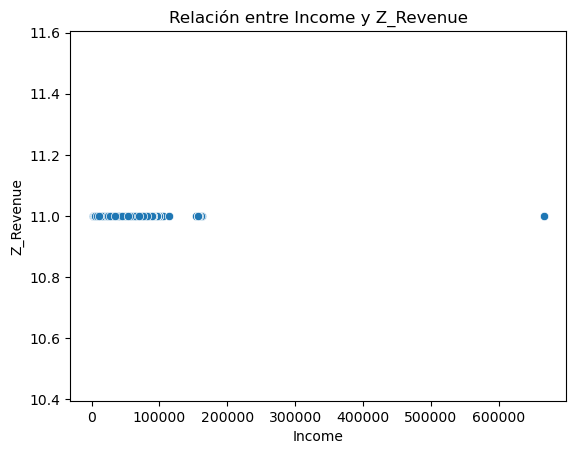

In [12]:
sns.scatterplot(x='Income', y='Z_Revenue', data=df)
plt.title('Relación entre Income y Z_Revenue')
plt.show()

Eje Y (Z_Revenue): El valor de Z_Revenue es constante en aproximadamente 11 para todos los clientes. Esto confirma que Z_Revenue no aporta variabilidad ni información específica entre los registros.

Eje X (Income): Los valores de Income muestran una distribución dispersa y varían considerablemente entre clientes, desde valores bajos hasta registros con ingresos altos.

Relación entre ambas columnas: Dado que Z_Revenue es constante, no tiene ninguna relación con Income. Esto se puede inferir porque no hay un patrón, pendiente, o correlación evidente entre las dos variables.

Conclusión:
Z_Revenue no tiene utilidad para imputar los valores faltantes en Income, ya que no está relacionada con esta columna y no aporta información adicional.
En este caso, sería mejor analizar otras variables (como educación, estado civil, etc.) para imputar los datos de Income.

### Imputación basada en otras variables relacionadas.

Analizamos que existen columnas que estan relacionadas con Income como Education, Marital_Status.
Por ejemplo:

Calcular la media/mediana de Income por nivel educativo.

Educación:

Generalmente, las personas con niveles educativos más altos tienden a acceder a trabajos mejor remunerados y más estables, ya que tienen habilidades más especializadas y demandadas en el mercado laboral.
Los títulos avanzados pueden llevar a carreras con contratos formales y beneficios adicionales, lo que influye en la estabilidad de sus ingresos.

In [ ]:
# Imputación por la mediana de 'Income' según el nivel educativo
df['Income'] = df.groupby('Education')['Income'].transform(lambda x: x.fillna(x.median()))

In [15]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
ID,2240,0,0.0
NumDealsPurchases,2240,0,0.0
Z_Revenue,2240,0,0.0
Z_CostContact,2240,0,0.0
Complain,2240,0,0.0
AcceptedCmp2,2240,0,0.0
AcceptedCmp1,2240,0,0.0
AcceptedCmp5,2240,0,0.0
AcceptedCmp4,2240,0,0.0
AcceptedCmp3,2240,0,0.0


Identificación de valores duplicados

In [16]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [17]:
# Codificación de variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

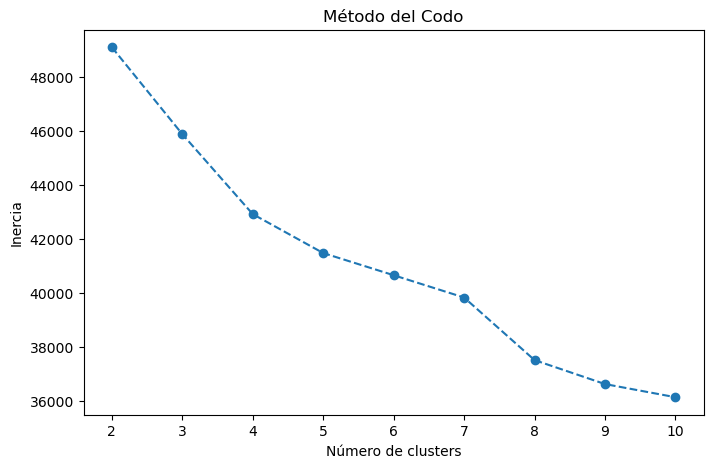

In [19]:
# Normalización de los datos
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df.select_dtypes(include=[np.number]))

# Determinación del número óptimo de clusters con el método del codo
inertia = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(2, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

El gráfico muestra el "Método del Codo" para determinar el número óptimo de clusters en un análisis de agrupamiento. En el eje y se encuentra la "Inercia" y en el eje x el "Número de clusters". La inercia disminuye a medida que aumenta el número de clusters, pero hay un punto donde la disminución se vuelve menos pronunciada, formando un "codo".

Según el gráfico, el "codo" se encuentra alrededor del número 4, por lo que se recomienda usar 4 clusters.

#### 2. Análisis No Supervisado

Proceso de K-means Clustering

En este proceso, realizamos un análisis no supervisado utilizando el algoritmo de K-means para agrupar las actividades físicas de los usuarios basándonos en los datos sensoriales proporcionados. Seleccionamos características sensoriales específicas del dataset y aplicamos K-means para identificar los grupos.

In [20]:
# K-means con el número óptimo de clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)
df['Cluster'] = clusters

In [21]:
# Análisis de los clusters
print(df.groupby('Cluster').mean())

                  ID   Year_Birth  Education  Marital_Status        Income  \
Cluster                                                                      
0        5652.967262  1971.815476   2.249008        3.724206  34491.115079   
1        5571.608187  1969.356725   2.514620        3.742690  81570.704678   
2        5432.791803  1964.357377   2.670492        3.683607  57310.713115   
3        5679.598670  1967.886918   2.297118        3.800443  73942.889135   

          Kidhome  Teenhome  Dt_Customer    Recency    MntWines  ...  \
Cluster                                                          ...   
0        0.809524  0.427579   329.391865  49.047619   38.223214  ...   
1        0.052632  0.128655   311.345029  49.830409  874.701754  ...   
2        0.242623  0.945902   332.006557  48.813115  444.826230  ...   
3        0.048780  0.230599   325.166297  49.374723  490.840355  ...   

         NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
Cluster                   

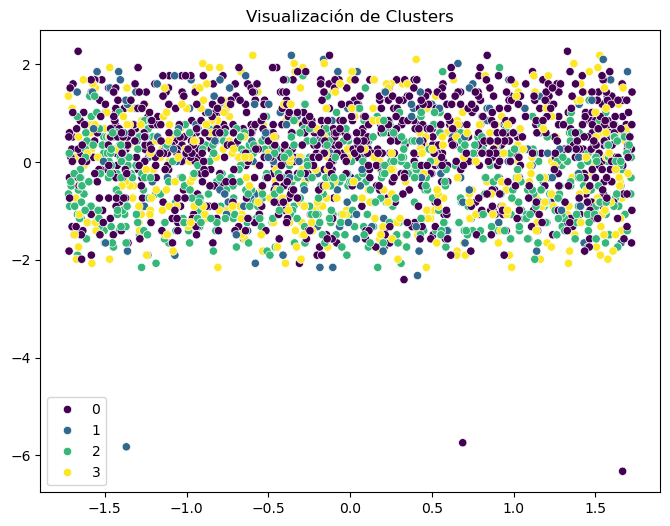

In [22]:
# Visualización de clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_features[:, 0], y=scaled_features[:, 1], hue=clusters, palette='viridis')
plt.title('Visualización de Clusters')
plt.show()

Descripción del Gráfico:

Datos: Puntos de datos distribuidos en el plano bidimensional.

Categorías de Clusters: Cuatro categorías, representadas por colores morado, verde, azul y amarillo.

Leyenda: La leyenda en la esquina inferior izquierda del gráfico indica la correspondencia entre los colores y las categorías de clusters.

Resumen de Resultados
Número de Clusters:

El gráfico sugiere la existencia de cuatro clusters, cada uno representado por un color diferente.

Distribución de los Datos:

Los puntos de datos están bien distribuidos dentro de sus respectivos clusters, lo que indica una clara separación entre las diferentes categorías.

Visualización:

La visualización clara de los clusters ayuda a identificar patrones en los datos y a entender mejor la estructura subyacente.

Comentario: El gráfico de dispersión proporciona una visualización clara de cómo se agrupan los datos en diferentes clusters. Esta representación es útil para el análisis de patrones y la identificación de estructuras en los datos. La separación visible entre los clusters sugiere que el análisis ha sido efectivo para diferenciar entre las diferentes categorías de datos.

Conclusión
El análisis de clusters ha identificado cuatro categorías distintas en los datos sensoriales. Esta información es valiosa para entender mejor los patrones de actividad y las diferencias entre las distintas actividades físicas.

In [ ]:
# División del dataset para modelado
target = 'Response'
X = df.drop(columns=[target])
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [38]:
# Asignar pesos de clase
class_weights = {0: 1, 1: 10}

Elegimos Response como la columna objetivo porque está directamente relacionada con la acción que deseamos precedir: si un cliente realizará una compra en el futuro, específicamente en respuesta a una campaña de marketing.

1. Relevancia para el negocio: La columna Response indica si un cliente ha respondido a una campaña, lo que generalmente implica que ha realizado una compra o está interesado en comprar productos. Predecir esta respuesta es valioso para las empresas, ya que permite identificar qué clientes son más propensos a realizar una compra futura.

2. Naturaleza binaria: La columna Response es binaria (0 o 1), lo que la hace ideal para un modelo de clasificación. Un Perceptrón Multicapa (MLP) es adecuado para este tipo de tarea, ya que puede aprender a clasificar si un cliente es probable que responda a una campaña o no.

2. Generalización: Usar Response como objetivo te permite construir un modelo más general, que pueda predecir la probabilidad de que un cliente participe en campañas futuras, sin necesidad de enfocarte en campañas individuales. Esto también puede ayudar a personalizar las estrategias de marketing de manera más efectiva.

En resumen, elegimos Response como columna objetivo debido a que se alinea bien con el objetivo de predecir la probabilidad de compra futura en base al comportamiento de los clientes, lo cual es clave para la optimización de campañas de marketing.

Crear el modelo MLP

El modelo está configurado con dos capas ocultas de tamaños 128 y 64, respectivamente.

In [44]:
# Sobremuestreo de la clase minoritaria
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Entrenamiento del Perceptrón Multicapa (MLP)
mlp = MLPClassifier(hidden_layer_sizes=(100, 64), max_iter=500, random_state=42)
mlp.fit(X_train_res, y_train_res)


MLPClassifier(hidden_layer_sizes=(100, 64), max_iter=500, random_state=42)

In [45]:
# Evaluación del modelo
y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

print("Evaluación en el conjunto de entrenamiento:")
print(classification_report(y_train, y_train_pred))
print("Evaluación en el conjunto de prueba:")
print(classification_report(y_test, y_test_pred))

Evaluación en el conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.91      0.63      0.75      1525
           1       0.23      0.63      0.34       267

    accuracy                           0.63      1792
   macro avg       0.57      0.63      0.54      1792
weighted avg       0.81      0.63      0.69      1792

Evaluación en el conjunto de prueba:
              precision    recall  f1-score   support

           0       0.91      0.63      0.74       381
           1       0.24      0.66      0.35        67

    accuracy                           0.63       448
   macro avg       0.57      0.64      0.55       448
weighted avg       0.81      0.63      0.68       448



#### Resumen del Resultado

Desempeño del Modelo

Clase 0:

Entrenamiento: El modelo tiene alta precisión (0.91) pero un recall más bajo (0.63), lo que significa que identifica correctamente la clase 0 la mayoría de las veces, pero no todas.

Prueba: La precisión se mantiene alta (0.91) con un recall similar (0.63), indicando consistencia en el desempeño entre los conjuntos de entrenamiento y prueba.

Clase 1:

Entrenamiento: La precisión es baja (0.23) pero el recall es más alto (0.63), lo que sugiere que el modelo identifica muchas instancias de la clase 1 pero también clasifica incorrectamente muchas.

Prueba: La precisión (0.24) y el recall (0.66) son similares al conjunto de entrenamiento, mostrando que el modelo tiene dificultades con la clase 1 en ambos conjuntos.

Exactitud Global:

Entrenamiento y Prueba: La exactitud es del 63% en ambos conjuntos, lo que indica que el modelo clasifica correctamente aproximadamente 6 de cada 10 instancias.

Promedios Macro y Ponderado:

Los promedios macro y ponderado muestran un desempeño general similar entre los conjuntos de entrenamiento y prueba, reflejando el desequilibrio de clases y el rendimiento desigual del modelo

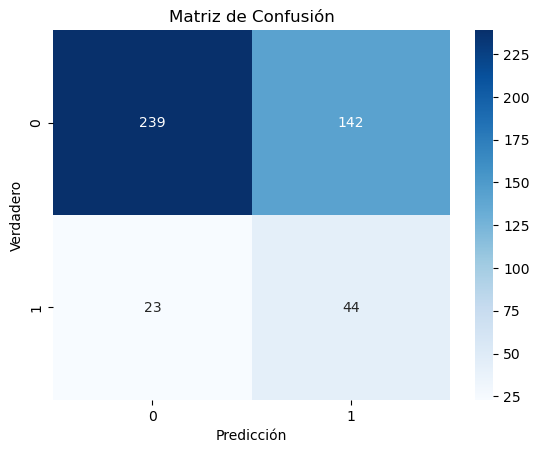

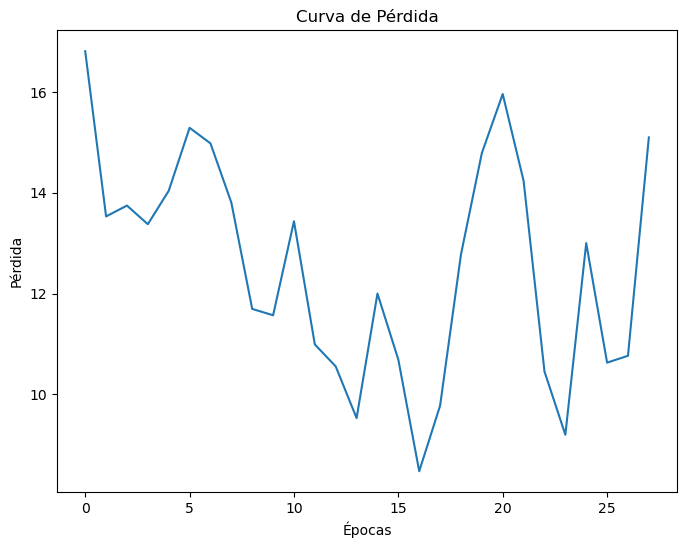

In [46]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Verdadero')
plt.show()

# Curvas de aprendizaje
plt.figure(figsize=(8, 6))
plt.plot(mlp.loss_curve_)
plt.title('Curva de Pérdida')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.show()

Resumen:

Curva de Pérdida:

La curva de pérdida muestra una disminución constante, indicando que el modelo está aprendiendo y ajustándose a los datos, aunque las fluctuaciones sugieren la necesidad de ajustar hiperparámetros.

Matriz de Confusión:

La matriz de confusión revela un rendimiento desigual del modelo, con una alta precisión para la clase 0 y dificultades para clasificar correctamente la clase 1.

Posibles correciones:

El análisis combinado de la curva de pérdida y la matriz de confusión sugiere que el modelo MLP necesita ajustes para mejorar su estabilidad y capacidad de generalización.

Recomendaciones:

Ajuste de Hiperparámetros: Modificar la tasa de aprendizaje, tamaño del batch y número de capas ocultas puede ayudar a estabilizar el entrenamiento.

Balanceo de Clases: Utilizar técnicas como el sobremuestreo (oversampling) de la clase minoritaria o el submuestreo (undersampling) de la clase mayoritaria para abordar el problema de desequilibrio de clases.

Regularización: Implementar técnicas de regularización como Dropout o L2 regularization para mejorar la estabilidad del modelo.